# Recipe Recomendation Project

### Trabalho Final - TERA - Recomendação
Francisco Ottoni, Giovana Bandinelli, Madson Nascimento de Lima e Sonia Gondo

Fonte do banco de dados: https://www.kaggle.com/code/takuyaishii/recipe-preprocessing/data

Colunas da base:

RecipeId : Id da receita

Name : Nome da receita

CookTime : Tempo de cozimento

PrepTime : Tempo de preparo

TotalTime : Tempo total de preparo (Cozimento + Preparo)

Description : Descrição da receita

Images : link das imagens

RecipeCategory : Categoria da receita

Keywords : Palavras chaves da receita

RecipeIngredientQuantities: Quantidade de cada ingrediente

RecipeIngredientParts: Ingredientes

AggregatedRating: Média das avaliações da receita

Calories: Valor colórico da receita

RecipeServings: Quantidade de pessoas servidas

RecipeYield: Rendimento da receita

RecipeInstructions: Instruções da receita

reviews_in_dict: Avaliações da receita no formato de um dicionário

### Bibliotecas e Configurações

In [234]:
#import de libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [235]:
#import From
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [236]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

### Leitura dos dados

In [420]:
df = pd.read_csv('recipe_10000.csv')
recipes = df.copy()
recipes.head()



,Unnamed: 0,index,RecipeId,Name,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,reviews_in_dict
0,0,0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,Make and share this Low-Fat Berry Blue Frozen ...,['https://img.sndimg.com/food/image/upload/w_5...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...","{579149: {'Rating': 5, 'Review': 'Yummy, yummy..."
1,1,4,39,Biryani,PT25M,PT4H,PT4H25M,Make and share this Biryani recipe from Food.com.,['https://img.sndimg.com/food/image/upload/w_5...,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,"{361851: {'Rating': 3, 'Review': 'I have an In..."
2,2,5,40,Best Lemonade,PT5M,PT30M,PT35M,This is from one of my first Good House Keepi...,['https://img.sndimg.com/food/image/upload/w_5...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...","{34854: {'Rating': 5, 'Review': ""My favourite ..."
3,3,14,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,This dish is best prepared a day in advance to...,['https://img.sndimg.com/food/image/upload/w_5...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...","{48870: {'Rating': 5, 'Review': 'I thought thi..."
4,4,16,42,Cabbage Soup,PT30M,PT20M,PT50M,Make and share this Cabbage Soup recipe from F...,['https://img.sndimg.com/food/image/upload/w_5...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,"{46368: {'Rating': 5, 'Review': 'This is a ver..."


### EDA

In [238]:
#informações sobre nome de colunas, numero de linhas e dtype

recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  10000 non-null  int64  
 1   index                       10000 non-null  int64  
 2   RecipeId                    10000 non-null  int64  
 3   Name                        10000 non-null  object 
 4   CookTime                    10000 non-null  object 
 5   PrepTime                    10000 non-null  object 
 6   TotalTime                   10000 non-null  object 
 7   Description                 10000 non-null  object 
 8   Images                      10000 non-null  object 
 9   RecipeCategory              10000 non-null  object 
 10  Keywords                    10000 non-null  object 
 11  RecipeIngredientQuantities  10000 non-null  object 
 12  RecipeIngredientParts       10000 non-null  object 
 13  AggregatedRating            1000

In [239]:
#exibindo o número de linhas e colunas iniciais

print('nosso dataset contém {} linhas e {} colunas.'.format(recipes.shape[0], recipes.shape[1]))

nosso dataset contém 10000 linhas e 19 colunas.


In [240]:
#Contando valores únicos

recipes.nunique()

Unnamed: 0                    10000
index                         10000
RecipeId                      10000
Name                           9653
CookTime                        152
PrepTime                         74
TotalTime                       328
Description                    9861
Images                        10000
RecipeCategory                  173
Keywords                       8084
RecipeIngredientQuantities     9539
RecipeIngredientParts          9920
AggregatedRating                  9
Calories                       5917
RecipeServings                   40
RecipeYield                    1472
RecipeInstructions             9999
reviews_in_dict               10000
dtype: int64

In [241]:
#contagem de valores nulos por coluna

recipes.isnull().sum().sort_values(ascending=False)

RecipeYield                   7001
RecipeServings                3853
reviews_in_dict                  0
Description                      0
index                            0
RecipeId                         0
Name                             0
CookTime                         0
PrepTime                         0
TotalTime                        0
RecipeCategory                   0
Images                           0
RecipeInstructions               0
Keywords                         0
RecipeIngredientQuantities       0
RecipeIngredientParts            0
AggregatedRating                 0
Calories                         0
Unnamed: 0                       0
dtype: int64

In [242]:
#categorias das receitas

recipes['RecipeCategory'].unique()

array(['Frozen Desserts', 'Chicken Breast', 'Beverages', 'Soy/Tofu',
       'Vegetable', 'Chicken', 'Pie', 'Dessert', 'Southwestern U.S.',
       'Stew', 'Lactose Free', 'Sauces', 'Brazilian', 'Potato', 'Cheese',
       'Lamb/Sheep', 'Scones', 'Drop Cookies', 'Weeknight',
       'Quick Breads', 'Low Protein', 'Curries', '< 60 Mins', '< 30 Mins',
       'Lunch/Snacks', 'Steak', 'Lobster', 'Pork', 'Chicken Livers',
       'Crab', 'Very Low Carbs', 'Chowders', 'Meat', 'Breakfast',
       'Hungarian', 'German', 'Onions', 'Bar Cookie', 'Indonesian',
       'Lentil', 'High Protein', 'Greek', 'Pineapple', 'Peppers',
       'Cauliflower', 'Breads', 'Yeast Breads', 'Fruit', 'Free Of...',
       'European', 'Mexican', 'Beans', 'One Dish Meal', 'Savory Pies',
       'Cheesecake', 'Candy', 'Long Grain Rice', 'Whole Chicken',
       '< 15 Mins', 'Rice', 'Apple', 'Tuna', 'Spaghetti', 'Jellies',
       'Gelatin', 'Healthy', 'Low Cholesterol', 'Shakes', 'Chutneys',
       'Tex Mex', 'Veal', 'Mussels',

In [243]:
recipes['RecipeCategory'].value_counts()

Dessert          1037
Lunch/Snacks      930
Vegetable         730
One Dish Meal     616
Chicken           510
                 ... 
Ethiopian           1
Danish              1
Wild Game           1
Canning             1
Nuts                1
Name: RecipeCategory, Length: 173, dtype: int64

In [244]:
#quantidade de receitas por tempo total de preparo

recipes['TotalTime'].value_counts()

PT30M       712
PT25M       660
PT40M       657
PT35M       605
PT45M       545
           ... 
PT121H        1
PT2H22M       1
PT1H48M       1
PT12H10M      1
PT15H50M      1
Name: TotalTime, Length: 328, dtype: int64

**RESULTADOS:** 
- nosso dataset contém 10000 linhas e 19 colunas;
- Só existem Valores Nulos em Duas colunas que são: RecipeYield e RecipeServings;
- Existem colunas que tentam repetir o index e não significam nada para o projeto (unnamed:0 e index) além de uma coluna com links de imagens que não vamos utilizar nesse momento;
- Existem muitas entradas difentes nas variavies de recipe category;
- Nosso dataset possuem váriaveis de tempo que são díficeis de serem útilizadas antes de realizar alguma transformação.

### Primeiras alterações, Transformação nas váriaveis de tempo e criação de colunas

In [421]:
#drop de colunas que não serão utilizadas

recipes.drop(columns=['Unnamed: 0', 'index', 'Images', 'RecipeId'], inplace=True)
recipes_final = recipes.copy()

In [422]:
#Usando regex para criar coluna de Horas

recipes['hours'] = recipes.TotalTime.str[2:].map(lambda x: re.search("^(.*?)[H]", x))
recipes['hours'] = recipes['hours'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [423]:
#usando regex para criar coluna de minutos

recipes['minutes'] = recipes.TotalTime.str[2:].map(lambda x: re.search("[0-9]{1,}M", x))
recipes['minutes'] = recipes['minutes'].apply(lambda x: 0 if x is None else x.group()[:-1])

In [424]:
#Criando coluna de tempo total em minutos

recipes['totaltime_min'] = (recipes["hours"].astype("int64") * 60) + recipes['minutes'].astype("int64")

##### old version

##### 

In [425]:
### Criando coluna de classificação de caloria

recipes['calories_classification'] = pd.qcut(recipes['Calories'],3, labels = ['Low','Medium','High'])

In [426]:
# criando lista para filtrar as 11 colunas de categoria de receitas com mais amostrar do dataset

food_category = ['Dessert',
                 'Lunch/Snacks',
                 'Vegetable',
                 'One Dish Meal',
                 'Chicken',
                 'Breads', 
                 'Quick Breads', 
                 'Pork',
                 'Breakfast',
                 'Potato',
                 'Meat']

#copiando apenas a coluna de catégoria de comidas

filtro = recipes.RecipeCategory.copy()

In [427]:
#criando função para concatenar as outras categorias menos importantes:

def cat_food(x):
    if x in food_category:
        return x
    else:
        return 'Outros'

In [428]:
#realizando a transformação

filtro = filtro.map(cat_food)

### Graficos

In [253]:
#histograma com as 12 categorias com mais receitas.

sns.histplot(filtro,  )
plt.xticks(rotation=60)
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

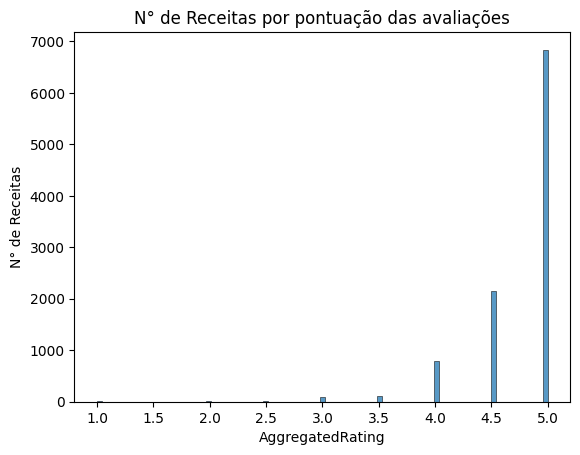

In [ ]:
sns.histplot(recipes['AggregatedRating'])
plt.title('N° de Receitas por pontuação das avaliações')
#plt.savefig('Histograma_avaliação_receitas.png', format='png')
plt.ylabel('N° de Receitas');

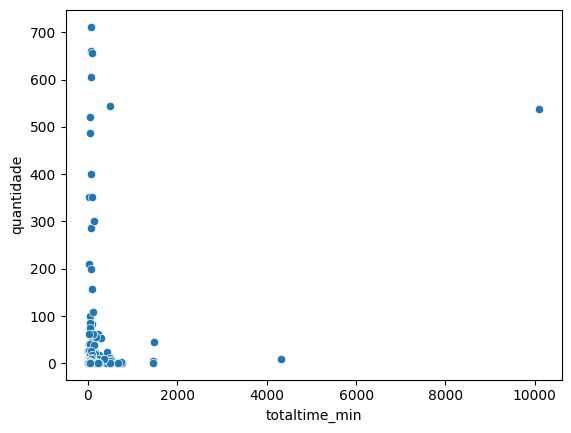

In [ ]:
#Plot da distribuição da quantidade de receitas por tempo total

sns.scatterplot(x = recipes.totaltime_min, y = recipes.totaltime_min.value_counts())
plt.ylabel('quantidade')
plt.show()

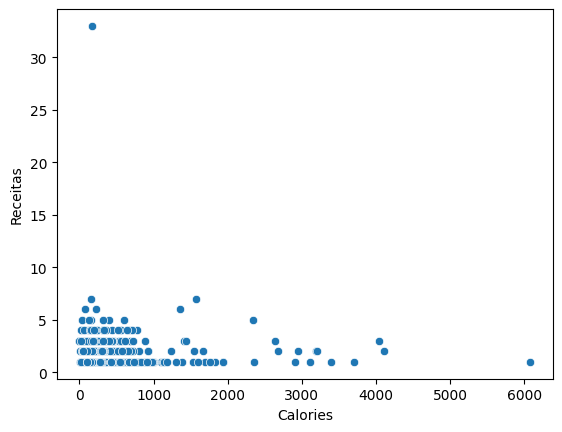

In [ ]:
#Plot da distribuição das calorias

sns.scatterplot(x = recipes.Calories, y = recipes.Calories.value_counts())
plt.ylabel('Receitas')
plt.show()

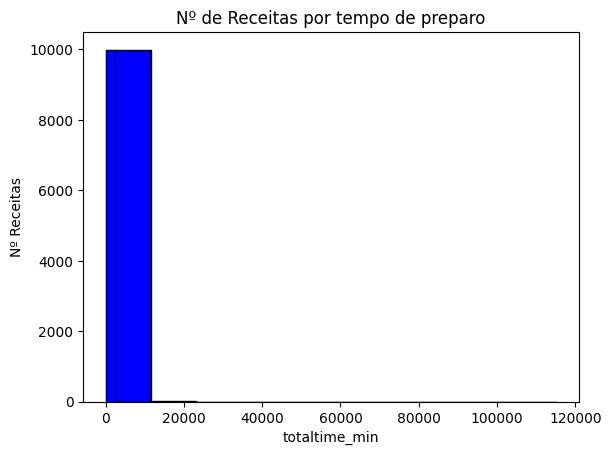

In [ ]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

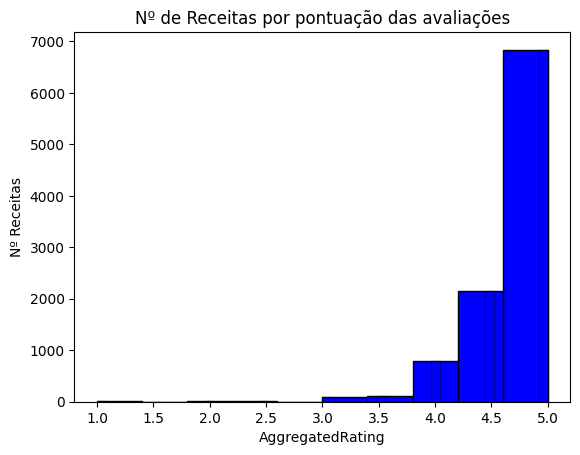

In [ ]:

# matplotlib histogram

plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

**Resultados:**
- Existem muitas catégorias de receitas pequenas, que ao serem agrupadas, se tornam a maior catégoria presente no dataset, a catégoria que possuí mais entradas são *desert* seguida por *Lunch/snacks*;

- As notas atribuidas as nossas receitas não são confiaveis já que praticamente todas elas recebem 5 estrelas, fazendo com que haja pouca confiabilidade nessa váriavel;

- A maior distribuição de receitas se encontra no intevalo de 0m até 1900m, entretanto existem observasão com 10000m que equivalem a quase 7 dias de preparo;

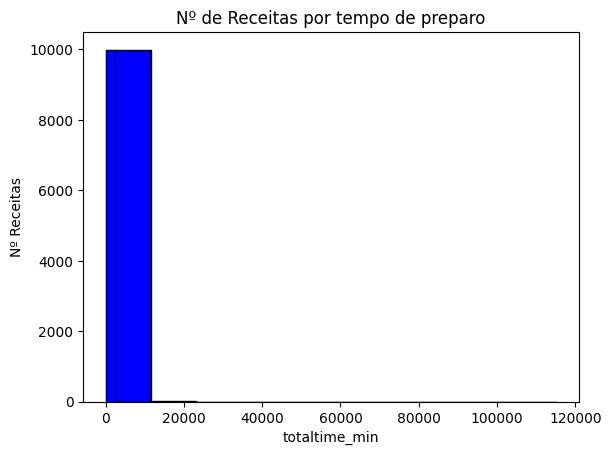

In [ ]:

# matplotlib histogram
plt.hist(recipes['totaltime_min'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['totaltime_min'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por tempo de preparo')
plt.xlabel('totaltime_min')
plt.ylabel('Nº Receitas')
plt.show()

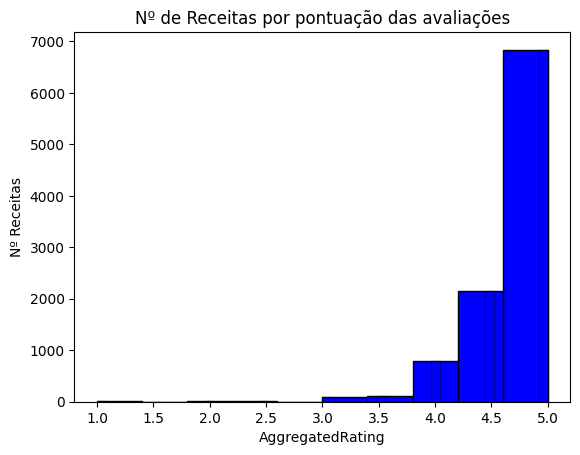

In [ ]:

# matplotlib histogram
plt.hist(recipes['AggregatedRating'], color = 'blue', edgecolor = 'black')

# seaborn histogram
sns.distplot(recipes['AggregatedRating'], hist=True, kde=False, 
             color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Nº de Receitas por pontuação das avaliações')
plt.xlabel('AggregatedRating')
plt.ylabel('Nº Receitas')
plt.show()

### EDA 2

In [429]:
#dropando colunas adicionais:
recipes.drop(columns=['CookTime', 'PrepTime', 'TotalTime', 'reviews_in_dict', ], inplace=True)
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,0,50,50,Low


In [430]:
categorias_peculiares = ['Kosher','Household Cleaner']
recipes[recipes.RecipeCategory.isin(category_sem_classificacao)]

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification
2935,Homemade Cough Syrup,Make and share this Homemade Cough Syrup recip...,Kosher,"['< 30 Mins', 'Stove Top', 'Easy']","['4', '4', '4', '3']","['cognac', 'honey', 'lemons']",3.5,40.0,8.0,NaN,['Mix ingredients to-gether in a saucepan and ...,0,20,20,Low


In [431]:
#dropando linhas com receitas de produtos de limpeza e xarope para tosse
recipes= recipes[recipes['RecipeCategory']!='Household Cleaner']
recipes= recipes[recipes['RecipeCategory']!='Kosher']

In [432]:
#explorando as colunas
recipes.describe().round(2)

,AggregatedRating,Calories,RecipeServings,totaltime_min
count,9995.00,9995.00,6146.00,9995.00
mean,4.77,494.05,7.62,125.79
std,0.41,742.15,7.51,1482.71
min,1.00,0.00,1.00,1.00
25%,4.50,177.90,4.00,27.00
50%,5.00,312.90,6.00,45.00
75%,5.00,515.00,8.00,72.00
max,5.00,13598.20,128.00,115230.00


In [258]:
#explorando as colunas
recipes.describe(include=np.object)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,RecipeYield,RecipeInstructions,hours,minutes
count,9995,9995,9995,9995,9995,9995,2995,9995,9995,9995
unique,9648,9856,171,8081,9535,9915,1469,9994,43,60
top,Banana Bread,Make and share this Banana Bread recipe from F...,Dessert,['< 60 Mins'],['1'],[],1 loaf,['Cook beans according to package directions.'...,0,30
freq,12,7,1037,75,32,20,119,2,6328,1056


In [433]:
#adicionando coluna com Macro Classifição das receitas em Salty, Sweet, Drink
recipe_macro_category = { '< 15 Mins' : 'Salty', '< 30 Mins' : 'Salty', '< 60 Mins' : 'Salty', 'African' : 'Salty', 'Apple' : 'Sweet', 'Asian' : 'Salty', 'Australian' : 'Salty',
                          'Bar Cookie' : 'Sweet', 'Bass' : 'Salty', 'Beans' : 'Salty', 'Beef Organ Meats' : 'Salty', 'Berries' : 'Sweet', 'Beverages' : 'Drink', 'Black Beans' : 'Salty',
                          'Brazilian' : 'Salty', 'Breads' : 'Salty', 'Breakfast' : 'Salty', 'Broil/Grill' : 'Salty', 'Brown Rice' : 'Salty', 'Cajun' : 'Salty', 'Canadian' : 'Salty', 
                          'Candy' : 'Sweet', 'Canning' : 'Salty', 'Caribbean' : 'Salty', 'Catfish' : 'Salty', 'Cauliflower' : 'Salty', 'Cheese' : 'Salty', 'Cheesecake' : 'Sweet', 
                          'Chicken' : 'Salty', 'Chicken Breast' : 'Salty', 'Chicken Livers' : 'Salty', 'Chicken Thigh & Leg' : 'Salty', 'Chinese' : 'Salty', 'Chowders' : 'Salty', 
                          'Christmas' : 'Salty', 'Chutneys' : 'Salty', 'Citrus' : 'Salty', 'Clear Soup' : 'Salty', 'Coconut' : 'Salty', 'Collard Greens' : 'Salty', 'Colombian' : 'Salty',
                          'Corn' : 'Salty', 'Costa Rican' : 'Salty', 'Crab' : 'Salty', 'Crawfish' : 'Salty', 'Creole' : 'Salty', 'Curries' : 'Salty', 'Danish' : 'Salty', 'Deer' : 'Salty', 
                          'Dessert' : 'Sweet', 'Drop Cookies' : 'Sweet', 'Duck Breasts' : 'Salty', 'Dutch' : 'Salty', 'Elk' : 'Salty', 'Ethiopian' : 'Salty', 'European' : 'Salty', 
                          'Free Of...' : 'Salty', 'Fruit' : 'Sweet', 'Gelatin' : 'Sweet', 'German' : 'Salty', 'Goose' : 'Salty', 'Grains' : 'Salty', 'Greek' : 'Salty', 'Greens' : 'Salty',
                          'Gumbo' : 'Salty', 'Halibut' : 'Salty', 'Ham' : 'Salty', 'Hawaiian' : 'Salty', 'Healthy' : 'Salty', 'High In...' : 'Salty', 'High Protein' : 'Salty', 
                          'Hungarian' : 'Salty', 'Indonesian' : 'Salty', 'Japanese' : 'Salty', 'Jellies' : 'Sweet', 'Kid Friendly' : 'Salty', 'Korean' : 'Salty', 'Lactose Free' : 'Salty',
                          'Lamb/Sheep' : 'Salty', 'Lentil' : 'Salty', 'Lobster' : 'Salty', 'Long Grain Rice' : 'Salty', 'Low Cholesterol' : 'Salty', 'Low Protein' : 'Salty', 'Lunch/Snacks' : 'Salty',
                          'Mahi Mahi' : 'Salty', 'Manicotti' : 'Salty', 'Meat' : 'Salty', 'Meatloaf' : 'Salty', 'Medium Grain Rice' : 'Salty', 'Melons' : 'Sweet', 'Mexican' : 'Salty', 
                          'Microwave' : 'Salty', 'Mussels' : 'Salty', 'Native American' : 'Salty', 'Nuts' : 'Salty', 'One Dish Meal' : 'Salty', 'Onions' : 'Salty', 'Orange Roughy' : 'Salty',
                          'Oranges' : 'Salty', 'Oven' : 'Salty', 'Papaya' : 'Sweet', 'Pasta Shells' : 'Salty', 'Peanut Butter' : 'Salty', 'Pears' : 'Sweet', 'Penne' : 'Salty', 'Peppers' : 'Salty',
                          'Perch' : 'Salty', 'Pheasant' : 'Salty', 'Pie' : 'Sweet', 'Pineapple' : 'Sweet', 'Plums' : 'Sweet', 'Polish' : 'Salty', 'Pork' : 'Salty', 'Portuguese' : 'Salty', 
                          'Potato' : 'Salty', 'Potluck' : 'Salty', 'Poultry' : 'Salty', 'Punch Beverage' : 'Drink', 'Quail' : 'Salty', 'Quick Breads' : 'Sweet', 'Raspberries' : 'Sweet', 
                          'Rice' : 'Salty', 'Roast Beef' : 'Salty', 'Salad Dressings' : 'Salty', 'Sauces' : 'Salty', 'Savory Pies' : 'Sweet', 'Scones' : 'Salty', 'Shakes' : 'Drink', 
                          'Short Grain Rice' : 'Salty', 'Smoothies' : 'Drink', 'Sourdough Breads' : 'Salty', 'Southwestern U.S.' : 'Salty', 'Soy/Tofu' : 'Salty', 'Spaghetti' : 'Salty', 
                          'Spanish' : 'Salty', 'Spicy' : 'Salty', 'Spinach' : 'Salty', 'Spreads' : 'Salty', 'Spring' : 'Salty', 'Squid' : 'Salty', 'Steak' : 'Salty', 'Stew' : 'Salty', 
                          'Stocks' : 'Salty', 'Strawberry' : 'Sweet', 'Summer' : 'Salty', 'Summer Dip' : 'Salty', 'Swedish' : 'Salty', 'Szechuan' : 'Salty', 'Tex Mex' : 'Salty', 'Thai' : 'Salty', 
                          'Thanksgiving' : 'Salty', 'Tilapia' : 'Salty', 'Trout' : 'Salty', 'Tuna' : 'Salty', 'Turkey Breasts' : 'Salty', 'Veal' : 'Salty', 'Vegan' : 'Salty', 'Vegetable' : 'Salty',
                          'Very Low Carbs' : 'Salty', 'Vietnamese' : 'Salty', 'Weeknight' : 'Salty', 'White Rice' : 'Salty', 'Whole Chicken' : 'Salty', 'Whole Duck' : 'Salty', 
                          'Whole Turkey' : 'Salty', 'Wild Game' : 'Salty', 'Winter' : 'Salty', 'Yam/Sweet Potato' : 'Salty', 'Yeast Breads' : 'Salty','Frozen Desserts' : 'Sweet'}
recipes['MacroClassification'] = recipes['RecipeCategory'].map(recipe_macro_category)
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,MacroClassification
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,Sweet
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,Salty
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,Drink
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,Salty
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...","['46', '4', '1', '2', '1']","['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,0,50,50,Low,Salty


**Resultados:**

### Tratamento de texto

#### Funções

In [434]:
#função para remover pontos e virgulas substituindo por espaços.

def clean_text(text: str) -> str:
    cleaned = text.lower()
    cleaned = re.sub(r'[^\w\s]', ' ', cleaned)
    return cleaned

In [261]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [435]:
#Função para remover stopwords em inlgês:

stopwords = nltk.corpus.stopwords.words('english')

def stopwords_remove(x):
    text_list = word_tokenize(x)
    filtered_sentence = []
    filtered_sentence = [w for w in text_list if not w.lower() in stopwords]
    for w in text_list:
        if w not in stopwords:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    return text

In [436]:
#Função para obter rootwords:

ps = PorterStemmer()

def stemmer_words(text):
    word_tokens = word_tokenize(text)
    stemmer_words = ' '.join(ps.stem(word) for word in word_tokens)
    return stemmer_words

In [437]:
def module(x):
    v = x
    normalized_v = normalize(v, axis=0).ravel()
    modulo = np.linalg.norm(normalized_v)
    return modulo

#### Abordagem


In [438]:
#função para aplicar a vetorização no dataset

def vectorize_txt(text):
    list_word = []
    list_word.append(text)
    matrix = vec.transform(list_word)
    return matrix.toarray()

In [439]:
coluna_texto = ['RecipeInstructions',
 'RecipeIngredientParts',
 'RecipeCategory',
 'Name',
 'Description',
 'Keywords']

In [440]:
def transform(x):
    
    y = str(x)+'_'+'clean'  
    recipes[y] = recipes[x].map(clean_text)
    recipes[y] = recipes[y].map(stopwords_remove)
    recipes[y] = recipes[y].map(stemmer_words)
    return recipes[y]
    

In [441]:
for i in coluna_texto:
    transform(i)


In [442]:
def transform_list(x):
    return x.split()

In [443]:
recipes['RecipeIngredientParts_clean_list'] = recipes['RecipeIngredientParts_clean'].apply(lambda x:transform_list(x))

In [444]:
vec=TfidfVectorizer()
vec.fit(recipes['RecipeIngredientParts_clean'])
recipes['RecipeIngredientParts_vector'] = recipes['RecipeInstructions_clean'].map(vectorize_txt)
recipes['RecipeIngredientParts_module'] = recipes['RecipeIngredientParts_vector'].map(module)

In [445]:
vec=TfidfVectorizer()
vec.fit(recipes['RecipeCategory_clean'])
recipes['RecipeCategory_vector']= recipes['RecipeCategory_clean'].map(vectorize_txt)
recipes['RecipeCategory_module'] = recipes['RecipeCategory_vector'].map(module)

In [446]:
vec=TfidfVectorizer()
vec.fit(recipes['Name_clean'])
recipes['Name_vector']= recipes['Name_clean'].map(vectorize_txt)
recipes['RecipeCategory_module'] = recipes['RecipeCategory_vector'].map(module)

In [447]:
vec=TfidfVectorizer()
vec.fit(recipes['Description_clean'])
recipes['Description_vector']= recipes['Description_clean'].map(vectorize_txt)
recipes['Description_module'] = recipes['Description_vector'].map(module)

In [448]:
vec=TfidfVectorizer()
vec.fit(recipes['Keywords_clean'])
recipes['Keywords_vector']= recipes['Keywords_clean'].map(vectorize_txt)
recipes['Keywords_module'] = recipes['Keywords_vector'].map(module)

In [449]:
recipes.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,MacroClassification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_clean_list,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...","['4', '1/4', '1', '1']","['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,Sweet,toss 2 cup berri sugar let stand 45 minut stir...,blueberri granul sugar vanilla yogurt lemon ju...,frozen dessert frozen dessert,low fat berri blue frozen dessert low fat berr...,make share low fat berri blue frozen dessert r...,dessert low protein low cholesterol healthi fr...,"[blueberri, granul, sugar, vanilla, yogurt, le...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.316625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...","['1', '4', '2', '2', '8', '1/4', '8', '1/2', '...","['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,Salty,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[saffron, milk, hot, green, chili, pepper, oni...","[[0.10102442194458891, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...","['1 1/2', '1', '1 1/2', '3/4']","['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,Drink,1 quart jar tight fit lid put sugar lemon peel...,sugar lemon rind lemon zest fresh water fresh ...,beverag beverag,best lemonad best lemonad,one first good hous keep cookbook must use zes...,low protein low cholesterol healthi summer 60 ...,"[sugar, lemon, rind, lemon, zest, fresh, water...","[[0.0, 0.0, 0.3719368401783449, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.291503,"[[0.0, 0.0, 0.25104514679998857, 0.0, 0.0, 0.0...",2.645751
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...","['12', '1', '2', '1', '10', '1', '3', '2', '2'...","['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,Salty,drain tofu care squeez excess water pat dri pa...,extra firm tofu eggplant zucchini mushroom soy...,soy tofu soy tofu,carina tofu veget kebab carina tofu veget kebab,dish best prepar day advanc allow ingredi soak...,bean veget low cholesterol weeknight broil gri...,"[extra, firm, tofu, eggplant, zucchini, mushro...","[[0.0, 0.

### Separando dataset por Categorias Macro

In [450]:
recipes_salty = recipes[recipes['MacroClassification']=='Salty']
recipes_sweet = recipes[recipes['MacroClassification']=='Sweet']
recipes_drink = recipes[recipes['MacroClassification']=='Drink']

### Modelagem

#### Recipes Salty

In [451]:
encoder = LabelEncoder()
recipes_salty['RecipeIngredientQuantities'] = encoder.fit_transform(recipes_salty['RecipeIngredientQuantities'])

In [453]:
recipes_salty.head(2)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,MacroClassification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_clean_list,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...",2432,"['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,Salty,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[saffron, milk, hot, green, chili, pepper, oni...","[[0.10102442194458891, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...",3319,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,Salty,drain tofu care squeez excess water pat dri pa...,extra firm tofu eggplant zucchini mushroom soy...,soy tofu soy tofu,carina tofu veget kebab carina tofu veget kebab,dish best prepar day advanc allow ingredi soak...,bean veget low cholesterol weeknight broil gri...,"[extra, firm, tofu, eggplant, zucchini, mushro...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6.557439,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.828427


In [454]:
colunas = ['RecipeIngredientParts_module',
            'RecipeCategory_module',
            'Description_module',
            'Keywords_module',
            'Calories',
            'AggregatedRating',
            'totaltime_min',
            'RecipeIngredientQuantities']

scaler = MinMaxScaler()
scale = scaler.fit_transform(recipes_salty[colunas])
recipes_salty_scale = pd.DataFrame(scale, columns= [colunas])

In [455]:
recipes_salty_scale

,RecipeIngredientParts_module,RecipeCategory_module,Description_module,Keywords_module,Calories,AggregatedRating,totaltime_min,RecipeIngredientQuantities
0,0.834388,0.565826,0.000000,0.503851,0.141689,0.500,0.005556,0.349425
1,0.737769,0.565826,0.083362,0.426058,0.068389,0.875,0.030704,0.476868
2,0.337526,0.000000,0.022953,0.466037,0.013216,0.875,0.001031,0.898851
3,0.551178,0.000000,0.262081,0.233019,0.114237,1.000,0.000779,0.483621
4,0.595341,0.565826,0.044318,0.466037,0.080074,1.000,0.001557,0.645833
...,...,...,...,...,...,...,...,...
7284,0.573685,0.000000,0.286473,0.503851,0.078403,1.000,0.000610,0.392529
7285,0.684364,0.000000,0.523795,0.426058,0.125041,1.000,0.002715,0.094684
7286,0.225018,0.000000,0.064383,0.337758,0.014632,1.000,0.000821,0.736925
7287,0.490414,0.000000,0.083362,0.233019,0.021533,0.875,0.000400,0.928592


In [456]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(recipes_salty_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

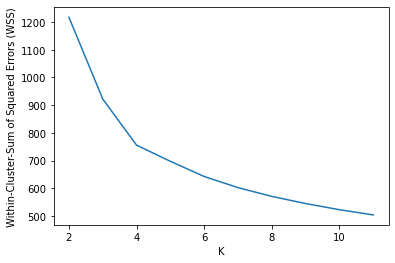

In [457]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [458]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(recipes_salty_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is " +str(metrics.silhouette_score(recipes_salty_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.386320560529443
Silhouette score for k(clusters) = 3 is 0.2985239301754445
Silhouette score for k(clusters) = 4 is 0.31186393510739857
Silhouette score for k(clusters) = 5 is 0.31025175908436836
Silhouette score for k(clusters) = 6 is 0.23054788579434962
Silhouette score for k(clusters) = 7 is 0.23320459625545234
Silhouette score for k(clusters) = 8 is 0.22598176673638548
Silhouette score for k(clusters) = 9 is 0.21491233573894056
Silhouette score for k(clusters) = 10 is 0.19455750297762273
Silhouette score for k(clusters) = 11 is 0.1969894183663254
Silhouette score for k(clusters) = 12 is 0.19440683864551567


In [459]:
kmeans  =  cluster.KMeans(n_clusters = 5, init = "k-means++") 
kmeans  =  kmeans.fit(recipes_salty_scale[colunas])

In [460]:
recipes_salty['Clusters'] = kmeans.labels_
recipes_salty.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,MacroClassification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_clean_list,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module,Clusters
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...",2432,"['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,Salty,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[saffron, milk, hot, green, chili, pepper, oni...","[[0.10102442194458891, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278,4
3,Carina's Tofu-Vegetable Kebabs,This dish is best prepared a day in advance to...,Soy/Tofu,"['Beans', 'Vegetable', 'Low Cholesterol', 'Wee...",3319,"['extra firm tofu', 'eggplant', 'zucchini', 'm...",4.5,536.1,2.0,4 kebabs,"['Drain the tofu, carefully squeezing out exce...",24,20,1460,High,Salty,drain tofu care squeez excess water pat dri pa...,extra firm tofu eggplant zucchini mushroom soy...,soy tofu soy tofu,carina tofu veget kebab carina tofu veget kebab,dish best prepar day advanc allow ingredi soak...,bean veget low cholesterol weeknight broil gri...,"[extra, firm, tofu, eggplant, zucchini, mushro...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",6.557439,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.828427,4
4,Cabbage Soup,Make and share this Cabbage Soup recipe from F...,Vegetable,"['Low Protein', 'Vegan', 'Low Cholesterol', 'H...",6256,"['plain tomato juice', 'cabbage', 'onion', 'ca...",4.5,103.6,4.0,NaN,['Mix everything together and bring to a boil....,0,50,50,Low,Salty,mix everyth togeth bring boil reduc heat simme...,plain tomato juic cabbag onion carrot celeri p...,veget veget,cabbag soup cabbag soup,make share cabbag soup recip food com make sha...,low protein vegan low cholesterol healthi wint...,"[plain, tomato, juic, cabbag, onion, carrot, c...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.645751,"[[0.0, 0.0, 0.22115666398268968, 0.0, 0.0, 0.0...",3.000000,0
5,Warm Chicken A La King,I copied this one out of a friend's book so ma...,Chicken,"['Poultry', 'Meat', '< 60 Mins']",3366,"['chicken', 'butter', 'flour', 'milk', 'celery...",5.0,895.5,2.0,NaN,"['Melt 1 1/2 ozs butter, add the flour and coo...",0,38,38,High,Salty,melt 1 1 2 oz butter add flour cook 2 3 minut ...,chicken butter flour milk celeri button mushro...,chicken chicken,warm chicken la king warm chicken la king,copi one friend book mani moon ago rememb deca...,poultri meat 60 min poultri meat 60 min,"[chicken, butter, flour, milk, celeri, button,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.898979,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [461]:
recipes_salty['Clusters'].value_counts()

0    2467
2    2322
3    1011
4    1005
1     484
Name: Clusters, dtype: int64

In [505]:
recipes_salty[recipes_salty['Clusters']==0]['RecipeCategory'].value_counts()

Vegetable       353
Chicken         310
Potato          225
Breads          216
Pork            197
               ... 
Vietnamese        1
Deer              1
Thanksgiving      1
Quail             1
Elk               1
Name: RecipeCategory, Length: 88, dtype: int64

#### Recipes Sweet

In [463]:
encoder = LabelEncoder()
recipes_sweet['RecipeIngredientQuantities'] = encoder.fit_transform(recipes_sweet['RecipeIngredientQuantities'])

In [464]:
colunas = ['RecipeIngredientParts_module',
            'RecipeCategory_module',
            'Description_module',
            'Keywords_module',
            'Calories',
            'AggregatedRating',
            'totaltime_min',
            'RecipeIngredientQuantities']

scaler = MinMaxScaler()
scale = scaler.fit_transform(recipes_sweet[colunas])
recipes_sweet_scale = pd.DataFrame(scale, columns= [colunas])

In [465]:
recipes_sweet_scale

,RecipeIngredientParts_module,RecipeCategory_module,Description_module,Keywords_module,Calories,AggregatedRating,totaltime_min,RecipeIngredientQuantities
0,0.444444,1.0,0.137086,0.554575,0.013485,0.875,0.034345,0.914826
1,0.608581,0.0,0.112685,0.317023,0.017991,0.750,0.001828,0.854890
2,0.555556,0.0,0.059907,0.422098,0.005445,0.750,0.001458,0.863565
3,0.555556,0.0,0.059907,0.371761,0.007054,0.875,0.001597,0.774448
4,0.608581,0.0,0.087031,0.256477,0.041238,1.000,0.002175,0.842666
...,...,...,...,...,...,...,...,...
2583,0.484322,0.0,0.087031,0.422098,0.013430,1.000,0.000671,0.040221
2584,0.521157,0.0,0.059907,0.317023,0.011087,1.000,0.001597,0.858044
2585,0.521157,0.0,0.059907,0.468950,0.316013,1.000,0.001597,0.217271
2586,0.555556,1.0,0.031027,0.512955,0.006928,0.750,0.000671,0.238170


In [466]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(recipes_sweet_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

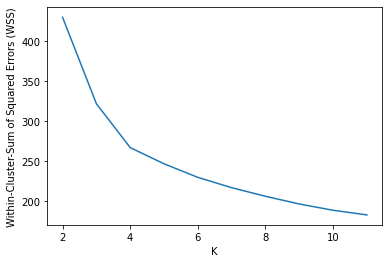

In [467]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [468]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(recipes_sweet_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is " +str(metrics.silhouette_score(recipes_sweet_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5311898227287924
Silhouette score for k(clusters) = 3 is 0.3958397220320236
Silhouette score for k(clusters) = 4 is 0.33353058408246694
Silhouette score for k(clusters) = 5 is 0.2575574741746388
Silhouette score for k(clusters) = 6 is 0.2510557703592931
Silhouette score for k(clusters) = 7 is 0.24558241069562592
Silhouette score for k(clusters) = 8 is 0.19831493942648945
Silhouette score for k(clusters) = 9 is 0.18784679498020773
Silhouette score for k(clusters) = 10 is 0.1887434819849385
Silhouette score for k(clusters) = 11 is 0.1803980060466194
Silhouette score for k(clusters) = 12 is 0.18785803990197827


In [469]:
kmeans  =  cluster.KMeans(n_clusters = 5, init = "k-means++") 
kmeans  =  kmeans.fit(recipes_sweet_scale[colunas])

In [470]:
recipes_sweet['Clusters'] = kmeans.labels_
recipes_sweet.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,MacroClassification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_clean_list,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module,Clusters
0,Low-Fat Berry Blue Frozen Dessert,Make and share this Low-Fat Berry Blue Frozen ...,Frozen Desserts,"['Dessert', 'Low Protein', 'Low Cholesterol', ...",2320,"['blueberries', 'granulated sugar', 'vanilla y...",4.5,170.9,4.0,NaN,"['Toss 2 cups berries with sugar.', 'Let stand...",24,45,1485,Low,Sweet,toss 2 cup berri sugar let stand 45 minut stir...,blueberri granul sugar vanilla yogurt lemon ju...,frozen dessert frozen dessert,low fat berri blue frozen dessert low fat berr...,make share low fat berri blue frozen dessert r...,dessert low protein low cholesterol healthi fr...,"[blueberri, granul, sugar, vanilla, yogurt, le...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",4.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.316625,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,4
6,Buttermilk Pie With Gingersnap Crumb Crust,Make and share this Buttermilk Pie With Ginger...,Pie,"['Dessert', 'Healthy', 'Weeknight', 'Oven', '<...",2168,"['sugar', 'margarine', 'egg', 'flour', 'salt',...",4.0,228.0,8.0,NaN,"['Preheat oven to 350°F.', 'Make pie crust, us...",1,20,80,Medium,Sweet,preheat oven 350 f make pie crust use 8 inch p...,sugar margarin egg flour salt buttermilk graha...,pie pie,buttermilk pie gingersnap crumb crust buttermi...,make share buttermilk pie gingersnap crumb cru...,dessert healthi weeknight oven 4 hour dessert ...,"[sugar, margarin, egg, flour, salt, buttermilk...","[[0.1591560839156559, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.477226,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.162278,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.236068,2
7,Butter Pecan Cookies,Make and share this Butter Pecan Cookies recip...,Dessert,"['Cookie & Brownie', 'Fruit', 'Nuts', 'Weeknig...",2190,"['butter', 'brown sugar', 'granulated sugar', ...",4.0,69.0,NaN,84 cookies,"['Preheat oven to 350 degrees.', 'Cream butter...",1,4,64,Low,Sweet,preheat oven 350 degre cream butter larg mix b...,butter brown sugar granul sugar vanilla extrac...,dessert dessert,butter pecan cooki butter pecan cooki,make share butter pecan cooki recip food com m...,cooki browni fruit nut weeknight oven 4 hour c...,"[butter, brown, sugar, granul, sugar, vanilla,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.828427,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.645751,2
9,Biscotti Di Prato,Make and share this Biscotti Di Prato recipe f...,Dessert,"['Cookie & Brownie', 'European', 'Weeknight', ...",1964,"['flour', 'sugar', 'baking powder', 'salt', 'e...",4.5,89.4,NaN,56 biscotti,"['EGG WASH 1 Egg, large 1 tsp Water In the bow...",1,10,70,Low,Sweet,egg wash 1 egg larg 1 tsp water bowl electr mi...,flour sugar bake powder salt egg vanilla egg w...,dessert dessert,biscotti di prato biscotti di prato,make share biscotti di prato recip food com ma...,cooki browni european weeknight oven 4 hour co...,"[flour, sugar, bake, powder, salt, egg, vanill...","[[0.14041989329509796, 0.0, 0.0, 0.0, 0.0, 0.0...",5.000000,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,.

In [471]:
recipes_sweet['Clusters'].value_counts()

3    793
2    692
4    464
1    447
0    192
Name: Clusters, dtype: int64

In [504]:
recipes_sweet[recipes_sweet['Clusters']==3]['RecipeCategory'].value_counts()

Dessert        509
Pie            134
Candy           50
Cheesecake      33
Fruit           24
Pineapple       18
Gelatin          7
Apple            5
Jellies          5
Papaya           2
Strawberry       2
Berries          2
Raspberries      2
Name: RecipeCategory, dtype: int64

#### Recipes Drinks

In [472]:
encoder = LabelEncoder()
recipes_drink['RecipeIngredientQuantities'] = encoder.fit_transform(recipes_drink['RecipeIngredientQuantities'])

In [473]:
colunas = ['RecipeIngredientParts_module',
            'RecipeCategory_module',
            'Description_module',
            'Keywords_module',
            'Calories',
            'AggregatedRating',
            'totaltime_min',
            'RecipeIngredientQuantities']

scaler = MinMaxScaler()
scale = scaler.fit_transform(recipes_drink[colunas])
recipes_drink_scale = pd.DataFrame(scale, columns= [colunas])

In [474]:
recipes_drink_scale

,RecipeIngredientParts_module,RecipeCategory_module,Description_module,Keywords_module,Calories,AggregatedRating,totaltime_min,RecipeIngredientQuantities
0,0.616936,0.0,0.500835,0.388699,0.022878,0.75,0.000286,0.017094
1,0.616936,0.0,0.000000,0.184886,0.002412,0.00,0.000417,0.743590
2,0.157199,0.0,0.034586,0.600440,0.009464,1.00,0.000069,0.230769
3,0.616936,0.0,0.178800,0.100316,0.161168,0.50,0.002239,0.170940
4,0.670647,0.0,0.097014,0.500507,0.004192,1.00,0.000200,0.290598
...,...,...,...,...,...,...,...,...
113,0.497466,0.0,0.066778,0.100316,0.005082,1.00,0.000156,0.931624
114,0.529134,0.0,0.034586,0.259394,0.013083,1.00,0.000286,0.717949
115,0.497466,0.0,0.066778,0.100316,0.029541,1.00,0.000069,0.367521
116,0.529134,0.0,0.066778,0.326754,0.020760,1.00,0.000078,0.837607


In [475]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(recipes_drink_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

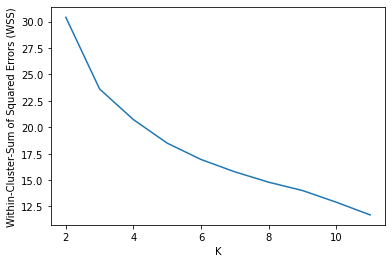

In [476]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [477]:
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(recipes_drink_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is " +str(metrics.silhouette_score(recipes_drink_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.4728979655263251
Silhouette score for k(clusters) = 3 is 0.26986178377144626
Silhouette score for k(clusters) = 4 is 0.24534220627943487
Silhouette score for k(clusters) = 5 is 0.24066786466882276
Silhouette score for k(clusters) = 6 is 0.23940707122201715
Silhouette score for k(clusters) = 7 is 0.21766714643727972
Silhouette score for k(clusters) = 8 is 0.21559625103585184
Silhouette score for k(clusters) = 9 is 0.22620798820081328
Silhouette score for k(clusters) = 10 is 0.2162636530537829
Silhouette score for k(clusters) = 11 is 0.21058082755797428
Silhouette score for k(clusters) = 12 is 0.21339301105944758


In [478]:
kmeans  =  cluster.KMeans(n_clusters = 4, init = "k-means++") 
kmeans  =  kmeans.fit(recipes_drink_scale[colunas])

In [479]:
recipes_drink['Clusters'] = kmeans.labels_
recipes_drink.head()

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,MacroClassification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_clean_list,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module,Clusters
2,Best Lemonade,This is from one of my first Good House Keepi...,Beverages,"['Low Protein', 'Low Cholesterol', 'Healthy', ...",2,"['sugar', 'lemons, rind of', 'lemon, zest of',...",4.5,311.1,4.0,NaN,"['Into a 1 quart Jar with tight fitting lid, p...",0,35,35,Medium,Drink,1 quart jar tight fit lid put sugar lemon peel...,sugar lemon rind lemon zest fresh water fresh ...,beverag beverag,best lemonad best lemonad,one first good hous keep cookbook must use zes...,low protein low cholesterol healthi summer 60 ...,"[sugar, lemon, rind, lemon, zest, fresh, water...","[[0.0, 0.0, 0.3719368401783449, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5.291503,"[[0.0, 0.0, 0.25104514679998857, 0.0, 0.0, 0.0...",2.645751,0
94,Lemonade,Make and share this Lemonade recipe from Food....,Beverages,"['Fruit', 'Summer', '< 60 Mins']",87,"['lemons', 'sugar', 'water', 'mint', 'lemon sl...",3.0,32.8,6.0,6-8 glasses,['Cut the lemons into dice. Put into a jug wi...,0,50,50,Low,Drink,cut lemon dice put jug sugar pour boil water l...,lemon sugar water mint lemon slice lemon sugar...,beverag beverag,lemonad lemonad,make share lemonad recip food com make share l...,fruit summer 60 min fruit summer 60 min,"[lemon, sugar, water, mint, lemon, slice, lemo...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.449490,"[[0.0, 0.0, 0.376011552726405, 0.0, 0.0, 0.0, ...",2.000000,2
282,Strawberry Shake,Make and share this Strawberry Shake recipe fr...,Shakes,"['Beverages', 'Breakfast', 'Strawberry', 'Berr...",27,"['fresh strawberries', 'skim milk', 'low-fat p...",5.0,128.7,2.0,NaN,['Place all ingredients in a blender bowl and ...,0,10,10,Low,Drink,place ingredi blender bowl process smooth serv...,fresh strawberri skim milk low fat plain yogur...,shake shake,strawberri shake strawberri shake,make share strawberri shake recip food com mak...,beverag breakfast strawberri berri fruit low c...,"[fresh, strawberri, skim, milk, low, fat, plai...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.732051,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.645751,"[[0.26869208168066805, 0.0, 0.0, 0.0, 0.0, 0.0...",3.316625,3
329,Another Russian Tea,This is an old favorite around our house for t...,Beverages,"['Russian', 'European', 'Easy']",20,"['water', 'whole cloves', 'cinnamon sticks', '...",4.0,2191.6,NaN,1 batch,['Boil water with cloves and cinnamon rapidly ...,4,20,260,High,Drink,boil water clove cinnamon rapidli 20 minut rem...,water whole clove cinnamon stick tea bag lemon...,beverag beverag,anoth russian tea anoth russian tea,old favorit around hous cold michigan fall win...,russian european easi russian european easi,"[water, whole, clove, cinnamon, stick, tea, ba...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.872983,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.464102,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.732051,0
381,Hot Mulled Apple C

In [480]:
recipes_drink['Clusters'].value_counts()

2    45
0    43
3    15
1    15
Name: Clusters, dtype: int64

In [306]:
recipes_drink[recipes_drink['Clusters']==3]['RecipeCategory'].value_counts()

Punch Beverage    15
Name: RecipeCategory, dtype: int64

In [481]:
recipes = pd.concat([recipes_salty, recipes_sweet, recipes_drink])
recipes.describe()

,RecipeIngredientQuantities,AggregatedRating,Calories,RecipeServings,totaltime_min,RecipeIngredientParts_module,RecipeCategory_module,Description_module,Keywords_module,Clusters
count,9995.000000,9995.000000,9995.000000,6146.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.000000,9995.00000
mean,2844.621511,4.771086,494.052446,7.622681,125.793997,4.331080,1.164145,3.594610,2.822816,1.84062
std,2029.888569,0.408992,742.152024,7.507002,1482.707272,1.090798,0.239330,0.989861,0.695618,1.38588
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.449490,1.000000,0.00000
25%,1119.000000,4.500000,177.900000,4.000000,27.000000,3.605551,1.000000,2.828427,2.236068,0.00000
50%,2330.000000,5.000000,312.900000,6.000000,45.000000,4.358899,1.000000,3.162278,2.828427,2.00000
75%,4539.500000,5.000000,515.000000,8.000000,72.000000,5.000000,1.414214,4.123106,3.316625,3.00000
max,6960.000000,5.000000,13598.200000,128.000000,115230.000000,9.000000,1.732051,11.000000,5.291503,4.00000


In [482]:
recipes.columns

Index(['Name', 'Description', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'Calories', 'RecipeServings', 'RecipeYield',
       'RecipeInstructions', 'hours', 'minutes', 'totaltime_min',
       'calories_classification', 'MacroClassification',
       'RecipeInstructions_clean', 'RecipeIngredientParts_clean',
       'RecipeCategory_clean', 'Name_clean', 'Description_clean',
       'Keywords_clean', 'RecipeIngredientParts_clean_list',
       'RecipeIngredientParts_vector', 'RecipeIngredientParts_module',
       'RecipeCategory_vector', 'RecipeCategory_module', 'Name_vector',
       'Description_vector', 'Description_module', 'Keywords_vector',
       'Keywords_module', 'Clusters'],
      dtype='object')

In [483]:
recipes.head(1)

,Name,Description,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,Calories,RecipeServings,RecipeYield,RecipeInstructions,hours,minutes,totaltime_min,calories_classification,MacroClassification,RecipeInstructions_clean,RecipeIngredientParts_clean,RecipeCategory_clean,Name_clean,Description_clean,Keywords_clean,RecipeIngredientParts_clean_list,RecipeIngredientParts_vector,RecipeIngredientParts_module,RecipeCategory_vector,RecipeCategory_module,Name_vector,Description_vector,Description_module,Keywords_vector,Keywords_module,Clusters
1,Biryani,Make and share this Biryani recipe from Food.com.,Chicken Breast,"['Chicken Thigh & Leg', 'Chicken', 'Poultry', ...",2432,"['saffron', 'milk', 'hot green chili peppers',...",3.0,1110.7,6.0,NaN,['Soak saffron in warm milk for 5 minutes and ...,4,25,265,High,Salty,soak saffron warm milk 5 minut pure blender ad...,saffron milk hot green chili pepper onion garl...,chicken breast chicken breast,biryani biryani,make share biryani recip food com make share b...,chicken thigh leg chicken poultri meat asian i...,"[saffron, milk, hot, green, chili, pepper, oni...","[[0.10102442194458891, 0.0, 0.0, 0.0, 0.0, 0.0...",7.416198,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.414214,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.44949,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23...",3.162278,4


#### Sistema de Recomendação

In [484]:
recipes[recipes['Name']=='Baked Salmon with Herb Sauce']['RecipeIngredientParts']

410    ['salmon fillets', 'butter', 'mayonnaise', 'pa...
Name: RecipeIngredientParts, dtype: object

In [490]:
def stemmer_words(ingredient_input):
        word_tokens = word_tokenize(ingredient_input)
        stemmer_words = ' '.join(ps.stem(word) for word in word_tokens)
        return stemmer_words

w=['potato', 'carrots', 'butter', 'salmon fillets']
list_root = [stemmer_words(i) for i in w]
list_root


['potato', 'carrot', 'butter', 'salmon fillet']

In [311]:
w=['potato', 'carrots', 'butter', 'salmon fillets']
teste = recipes[recipes['Name']=='Baked Salmon with Herb Sauce']['RecipeIngredientParts']

score_i_main = 1
for w in teste:
    print(w)
    if w in teste:
        score_i_main += 1
        print(score_i_main)

['salmon fillets', 'butter', 'mayonnaise', 'parsley', 'dill', 'lemon wedge', 'green onion']


In [498]:
# Sistema de recomendação baseado em um score calculado a partir do input do usuário dos ingredientes que possui, categoria desejada e avaliação geral da receita.
# Quanto mais ingredientes em comum entre o input do usuário e a receita do dataset, maior será o score da receita.

def score_recipes(macro_classification,ingredient_input,time, df, num_rec):
    '''
    macro_classification: Salty / Sweet / Drink
    ingredient_input: lista de ingredientes que o usuário possui
    df: dataset das receitas
    num_rec: numero de receitas recomendadas
    '''
    recipes_sistema_rec = recipes.copy()
    
    #Filtro do dataset de acordo com a tipo de receita desejada
    recipes_sistema_rec = recipes_sistema_rec[recipes_sistema_rec['MacroClassification'] == macro_classification]

    # Funçao para calcular a quantidade de ingredientes em comum com o input do usuário
    def amount_ingredient(ingredient_list):
        amount = 0
        for w in ingredient_input:
            if w in ingredient_list:
                amount += 1
        return amount

    #Função para contar total de ingredientes
    #def total_ingredient(x):
     #   text_list = word_tokenize(x)
      #  return text_list
    
    #Funçao para splitar o nome da receita
    def split_name(recipe_name):
        return recipe_name.lower().split()
    
    #Funçao para calcular o score baseado na quantidade de ingredientes em comum com o nome da receita
    def score_name(recipe_name):
        score_n = 0
        for w in ingredient_input:
            if w in recipe_name:
                score_n += 1
        return score_n

    
    recipes_sistema_rec['common_ingredient'] = recipes_sistema_rec['RecipeIngredientParts_clean_list'].apply(lambda x: amount_ingredient(x))
    #recipes_sistema_rec['score_ingredient'] = recipes_sistema_rec['RecipeIngredientParts_clean_list'].apply(lambda x: score_ingredient(x))
   #recipes_sistema_rec['main_ingredient_score'] = recipes_sistema_rec['RecipeIngredientParts_clean_list'].apply(lambda x: score_main_ingredient(x))
    recipes_sistema_rec['name_split'] = recipes_sistema_rec['Name'].apply(lambda x: split_name(x))
    recipes_sistema_rec['score_name'] = recipes_sistema_rec['name_split'].apply(lambda x: score_name(x))

    recipes_sistema_rec['score_ingredient_final'] =  recipes_sistema_rec['common_ingredient'] + recipes_sistema_rec['score_name']

    #filtrando dataset de acordo com o cluster que possui a receita com maior score dos ingredientes
    cluster_selected = recipes_sistema_rec.loc[recipes_sistema_rec['score_ingredient_final'].idxmax]['Clusters']
    recipes_sistema_rec = recipes_sistema_rec[recipes_sistema_rec['Clusters']==cluster_selected] 

    
    #filtrando dataset baseado no tempo máximo de preparo desejada pelo usuário
    recipes_sistema_rec = recipes_sistema_rec[recipes_sistema_rec.totaltime_min <= time] 

    col_list = ['score_ingredient_final','AggregatedRating']
    recipes_sistema_rec['score'] = recipes_sistema_rec[col_list].sum(axis=1)

    recipes_sistema_rec = recipes_sistema_rec.sort_values(by='score', ascending=False).iloc[:num_rec]
    # return recipes_sistema_rec
    return recipes_sistema_rec[['Name','common_ingredient','score','score_ingredient_final','score_name','AggregatedRating','Clusters','Description','RecipeCategory','RecipeIngredientParts','RecipeIngredientParts_clean_list','totaltime_min']]

In [524]:
ingredient_input = ['potato', 'carrot', 'butter', 'salmon']
macro_classification = 'Salty'
time = 30
score_recipes(macro_classification, ingredient_input, time, recipes, 10)

,Name,common_ingredient,score,score_ingredient_final,score_name,AggregatedRating,Clusters,Description,RecipeCategory,RecipeIngredientParts,RecipeIngredientParts_clean_list,totaltime_min
3446,Izzy's Salmon Chowder,4,9.5,5,1,4.5,2,My famous chowder. I spent some time try to fi...,Chowders,"['butter', 'onion', 'celery', 'green bell pepp...","[butter, onion, celeri, green, bell, pepper, g...",30
410,Baked Salmon with Herb Sauce,2,8.0,3,1,5.0,2,Make and share this Baked Salmon with Herb Sau...,Microwave,"['salmon fillets', 'butter', 'mayonnaise', 'pa...","[salmon, fillet, butter, mayonnais, parsley, d...",17
5544,Mashed Potato Pancakes,2,8.0,3,1,5.0,2,These are excellent for brunch. Try this as a ...,Breakfast,"['mashed potatoes', 'eggs', 'butter', 'flour',...","[mash, potato, egg, butter, flour, bake, powde...",25
8653,Javanese Roasted Salmon and Wilted Spinach,2,8.0,3,1,5.0,2,This salmon dish is amazing! I was invited for...,Japanese,"['unsalted butter', 'unsalted butter', 'dry cr...","[unsalt, butter, unsalt, butter, dri, crush, r...",30
617,Carrots in Orange-Basil Butter,2,7.5,3,1,4.5,2,This is my adopted recipe. This is delicious w...,Vegetable,"['carrot', 'water', 'butter', 'margarine', 'dr...","[carrot, water, butter, margarin, dri, basil, ...",20
6028,Grilled Glazed Salmon,2,7.5,3,1,4.5,2,"This is by far, my favorite company meal. We e...",Healthy,"['brown sugar', 'butter', 'margarine', 'lemon ...","[brown, sugar, butter, margarin, lemon, juic, ...",30
4005,Low Fat Curried Butternut Squash and Carrot soup,1,7.0,2,1,5.0,2,Make and share this Low Fat Curried Butternut ...,Vegetable,"['carrots', 'onion', 'garlic', 'curry powder',...","[carrot, onion, garlic, curri, powder, fat, fr...",30
4420,Brussels Sprouts in Garlic Butter,1,7.0,2,1,5.0,2,This is a recipe from Joy of Cooking... totall...,Vegetable,"['Brussels sprouts', 'butter', 'olive oil', 'g...","[brussel, sprout, butter, oliv, oil, garlic, p...",25
8779,"Braised Cabbage, Carrots &amp; Onions",2,7.0,2,0,5.0,2,"Make and share this Braised Cabbage, Carrots &...",Vegetable,"['cabbage', 'carrots', 'onions', 'butter', 'pa...","[cabbag, carrot, onion, butter, parsley, salt,...",30
5020,Carrots Piedmontese,2,7.0,2,0,5.0,2,Make and share this Carrots Piedmontese recipe...,Vegetable,"['carrot', 'butter', 'onion', 'garlic', 'salt'...","[carrot, butter, onion, garlic, salt, vinegar,...",30


In [509]:
list = recipes[recipes['Name']== "Izzy's Salmon Chowder"]['RecipeIngredientParts']
for i in list:
  print(i)

['butter', 'onion', 'celery', 'green bell pepper', 'garlic', 'potatoes', 'carrot', 'chicken broth', 'water', 'zucchini', 'salmon', 'milk', 'fresh parsley', 'butter']


In [379]:
list = recipes[recipes['Name']== 'Green beans with garlic butter']['RecipeIngredientParts']
count = 0
for element in list:
    for i in element:
        print(i)
        count += 1
print(count)

[
'
g
r
e
e
n
 
b
e
a
n
s
'
,
 
'
u
n
s
a
l
t
e
d
 
b
u
t
t
e
r
'
,
 
'
g
a
r
l
i
c
'
,
 
'
p
e
p
p
e
r
'
]
54
